In [2]:
# Step 0: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

In [3]:
# Step 1: Data Collection

ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-03-1'


df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Step 2: Exploratory Data Analysis (EDA)
# Data Overview

print("Data shape:", df.shape)


Data shape: (291, 6)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 291 entries, 2020-01-02 to 2021-02-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       291 non-null    float64
 1   High       291 non-null    float64
 2   Low        291 non-null    float64
 3   Close      291 non-null    float64
 4   Adj Close  291 non-null    float64
 5   Volume     291 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.9 KB


In [6]:
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  291.000000  291.000000  291.000000  291.000000  291.000000   
mean   100.137698  101.546486   98.684527  100.170481   98.057738   
std     24.146867   24.227884   23.670557   23.925393   23.657540   
min     57.020000   57.125000   53.152500   56.092499   54.706997   
25%     78.651249   79.614998   77.904999   78.746250   76.842178   
50%     99.172501   99.955002   96.742500   98.357498   96.187714   
75%    120.430000  122.810001  118.884998  120.919998  118.465691   
max    143.600006  145.089996  141.369995  143.160004  140.496262   

             Volume  
count  2.910000e+02  
mean   1.509896e+08  
std    6.813759e+07  
min    4.669130e+07  
25%    1.041180e+08  
50%    1.338384e+08  
75%    1.772322e+08  
max    4.265100e+08  


In [7]:
# Missing Values

print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349113,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200


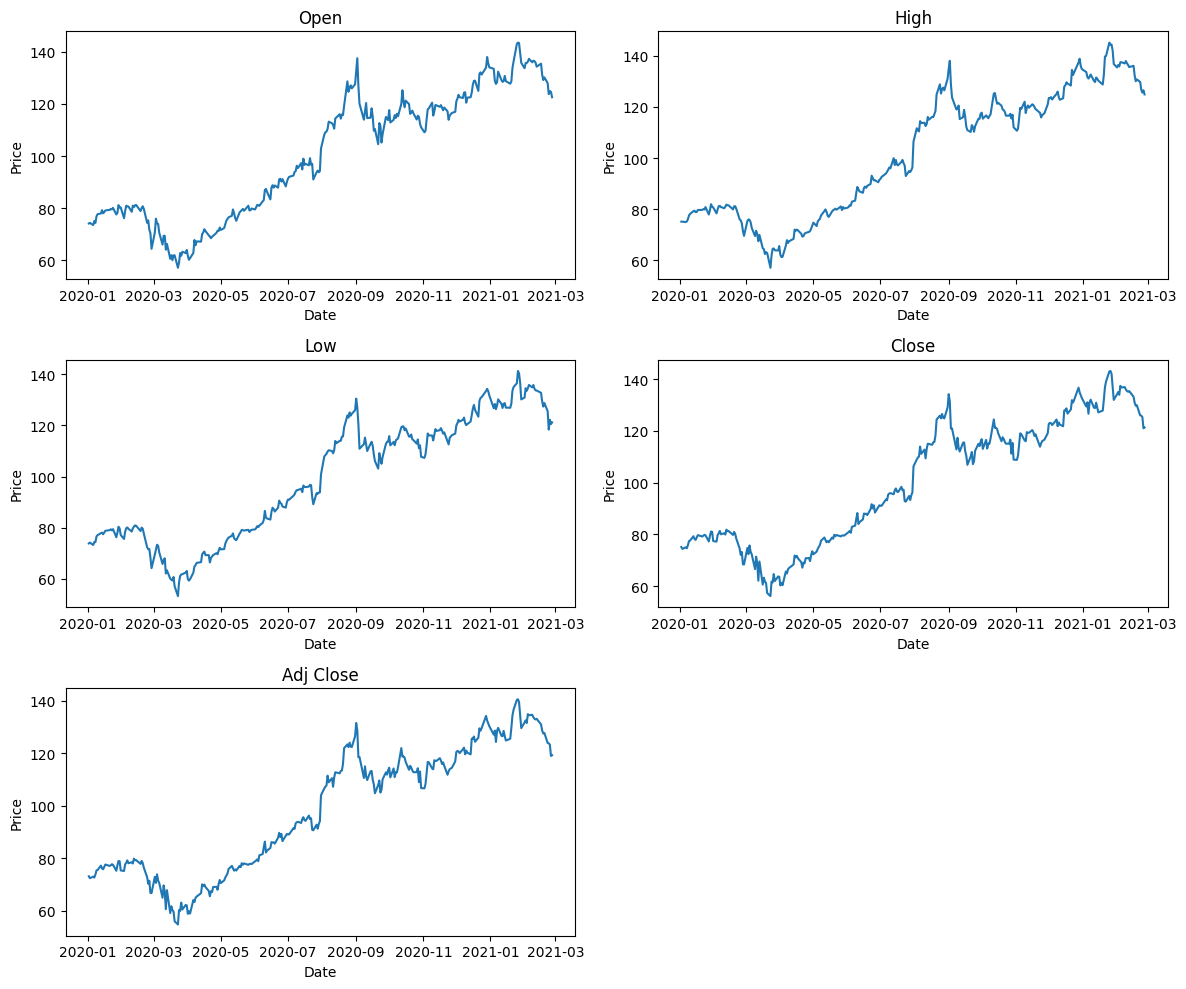

In [9]:
# Loading the data

data = df 

plt.figure(figsize=(12, 10))

# Plotting Open
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, subplot 1
plt.plot(data['Open'])
plt.title('Open')
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting High
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, subplot 2
plt.plot(data['High'])
plt.title('High')
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting Low
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, subplot 3
plt.plot(data['Low'])
plt.title('Low')
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting Close
plt.subplot(3, 2, 4)  # 3 rows, 2 columns, subplot 4
plt.plot(data['Close'])
plt.title('Close')
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting Adj Close
plt.subplot(3, 2, 5)  # 3 rows, 2 columns, subplot 5
plt.plot(data['Adj Close'])
plt.title('Adj Close')
plt.xlabel('Date')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

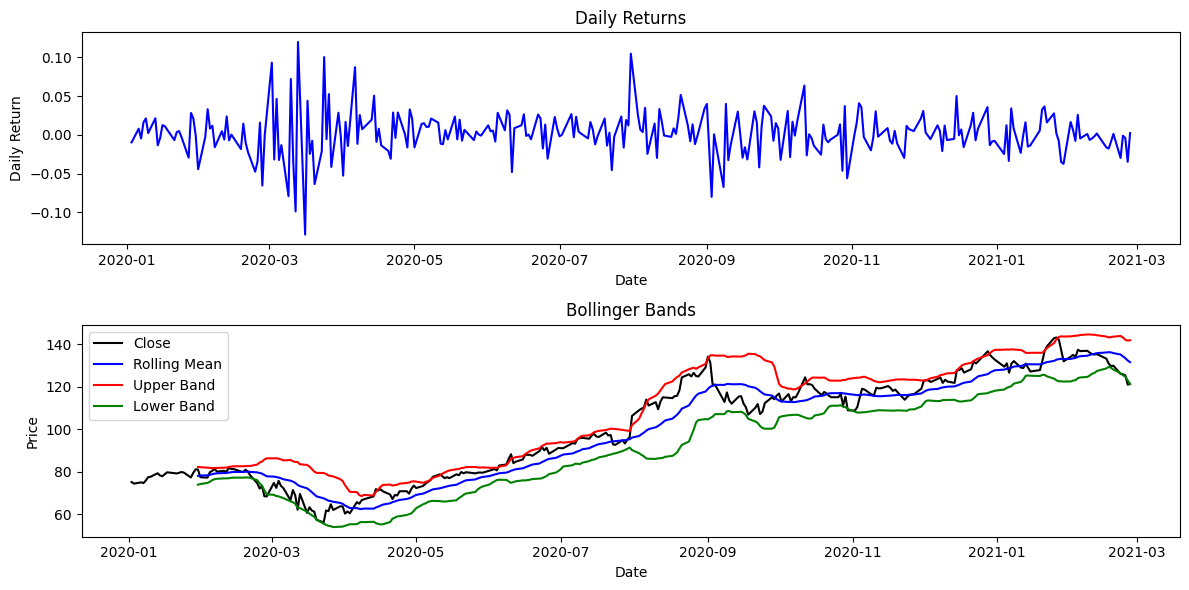

Volatility (Standard Deviation of Daily Returns): 0.028352855217383108


In [10]:
# Volatality Analysis

# Load the data
data = df

# Calculate daily returns
data['Daily Returns'] = data['Close'].pct_change()

# Calculate standard deviation of daily returns (volatility)
volatility = data['Daily Returns'].std()

# Calculate Bollinger Bands
window = 20  
data['Rolling Mean'] = data['Close'].rolling(window).mean()
data['Upper Band'] = data['Rolling Mean'] + 2 * data['Close'].rolling(window).std()
data['Lower Band'] = data['Rolling Mean'] - 2 * data['Close'].rolling(window).std()

# Plotting
plt.figure(figsize=(12, 6))

# Daily Returns
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Daily Returns'], color='blue')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# Bollinger Bands
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Close'], color='black', label='Close')
plt.plot(data.index, data['Rolling Mean'], color='blue', label='Rolling Mean')
plt.plot(data.index, data['Upper Band'], color='red', label='Upper Band')
plt.plot(data.index, data['Lower Band'], color='green', label='Lower Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

# Print volatility
print("Volatility (Standard Deviation of Daily Returns):", volatility)


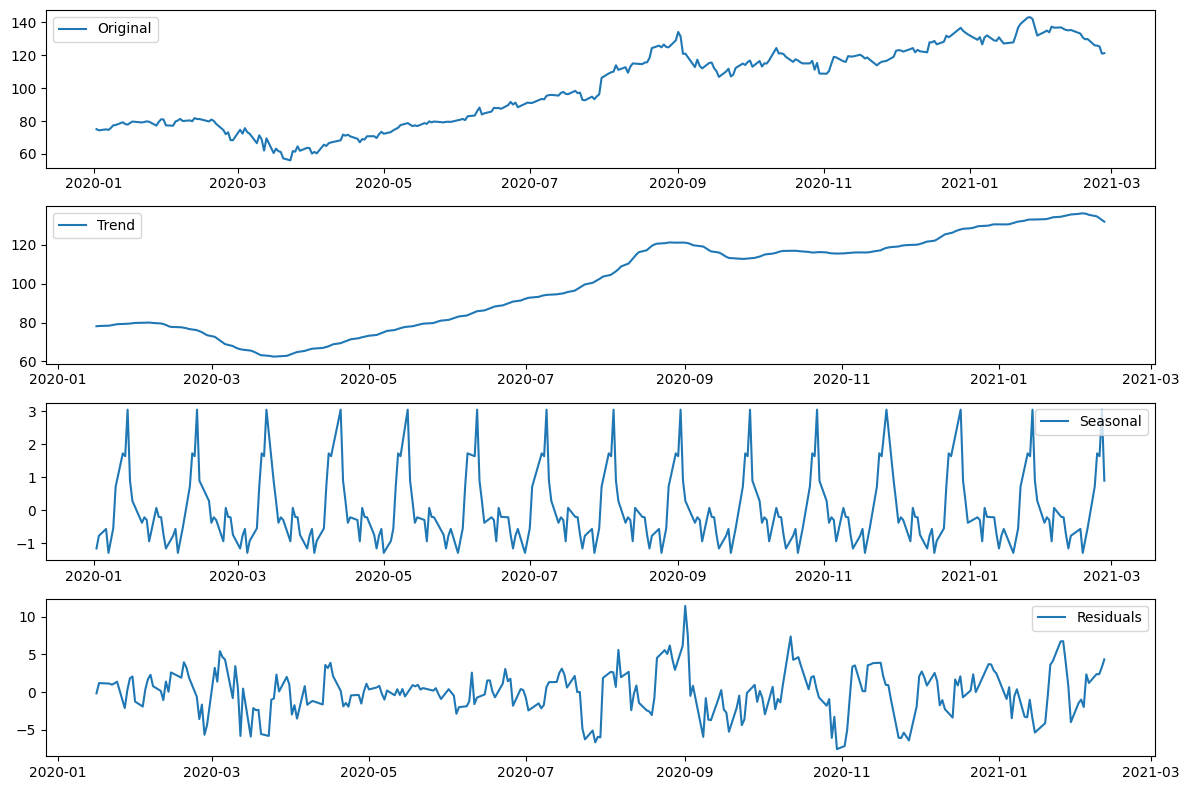

In [11]:
# Seasonal Decomposition

# Load the data
data = df


# Perform seasonal decomposition with adjusted period (e.g., 20 for monthly seasonality)
result = seasonal_decompose(data['Close'], model='additive', period=20)


# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Calculate summary statistics
summary_stats = data.describe()

# Print the summary statistics
print(summary_stats)

             Open        High         Low       Close   Adj Close  \
count  291.000000  291.000000  291.000000  291.000000  291.000000   
mean   100.137698  101.546486   98.684527  100.170481   98.057738   
std     24.146867   24.227884   23.670557   23.925393   23.657540   
min     57.020000   57.125000   53.152500   56.092499   54.706997   
25%     78.651249   79.614998   77.904999   78.746250   76.842178   
50%     99.172501   99.955002   96.742500   98.357498   96.187714   
75%    120.430000  122.810001  118.884998  120.919998  118.465691   
max    143.600006  145.089996  141.369995  143.160004  140.496262   

             Volume  Daily Returns  Rolling Mean  Upper Band  Lower Band  
count  2.910000e+02     290.000000    272.000000  272.000000  272.000000  
mean   1.509896e+08       0.002055     99.972958  108.182883   91.763034  
std    6.813759e+07       0.028353     23.329267   24.549061   22.577943  
min    4.669130e+07      -0.128647     62.365375   68.442952   53.878378  
25%

In [13]:
# Step 3: Data Preprocessing
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df = df.dropna() # Remove NaN values created by moving averages

# Splitting the dataset manually
train_df = df.loc['2020-01-01':'2021-01-01']
test_df = df.loc['2021-01-02':'2021-02-01']
validation_df = df.loc['2021-02-02':'2021-03-01']

# Prepare features and target for each set (assuming you're predicting Close prices using the same features)
X_train = train_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_train = train_df['Close']

X_test = test_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_test = test_df['Close']

X_validation = validation_df[['Open', 'High', 'Low', 'MA5', 'MA10']]
y_validation = validation_df['Close']

In [14]:
# Step 4: Model Training
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Predictions
y_pred = decision_tree_model.predict(X_test)

In [15]:
print(y_pred)

[131.3999939  128.69999695 129.03999329 128.69999695 130.96000671
 128.69999695 129.03999329 128.69999695 130.96000671 129.03999329
 128.22999573 128.69999695 136.69000244 136.69000244 134.86999512
 134.86999512 134.86999512 134.86999512 133.72000122 134.17999268]


In [16]:
print(y_test)

Date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
2021-01-19    127.830002
2021-01-20    132.029999
2021-01-21    136.869995
2021-01-22    139.070007
2021-01-25    142.919998
2021-01-26    143.160004
2021-01-27    142.059998
2021-01-28    137.089996
2021-01-29    131.960007
2021-02-01    134.139999
Name: Close, dtype: float64


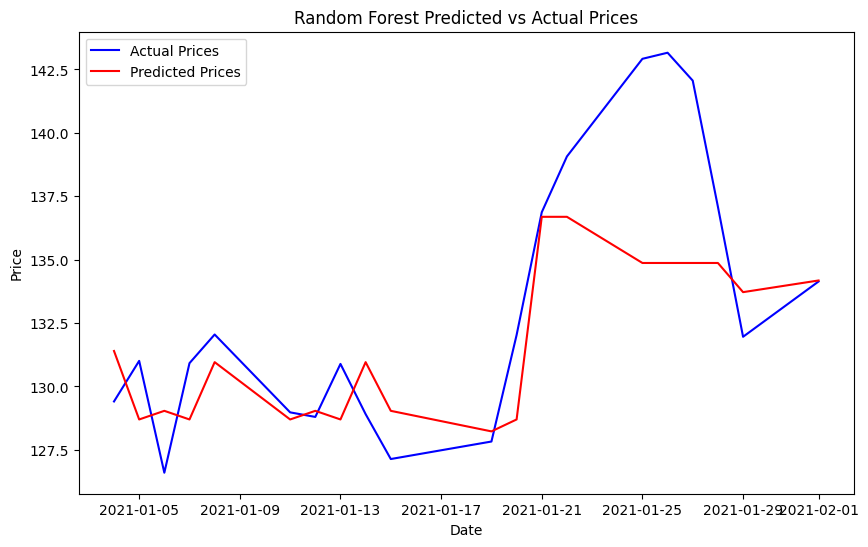

In [17]:
# Visualize Predictions
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('Random Forest Predicted vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Additionally, perform predictions and evaluation on the validation set
y_pred_validation = decision_tree_model.predict(X_validation)
rmse_validation = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
r2_validation = r2_score(y_validation, y_pred_validation)
print(f"Validation RMSE: {rmse_validation}")
print(f"Validation R² score: {r2_validation}")

Validation RMSE: 1.9210289146258135
Validation R² score: 0.8664820813296681


In [19]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2.527498245239258


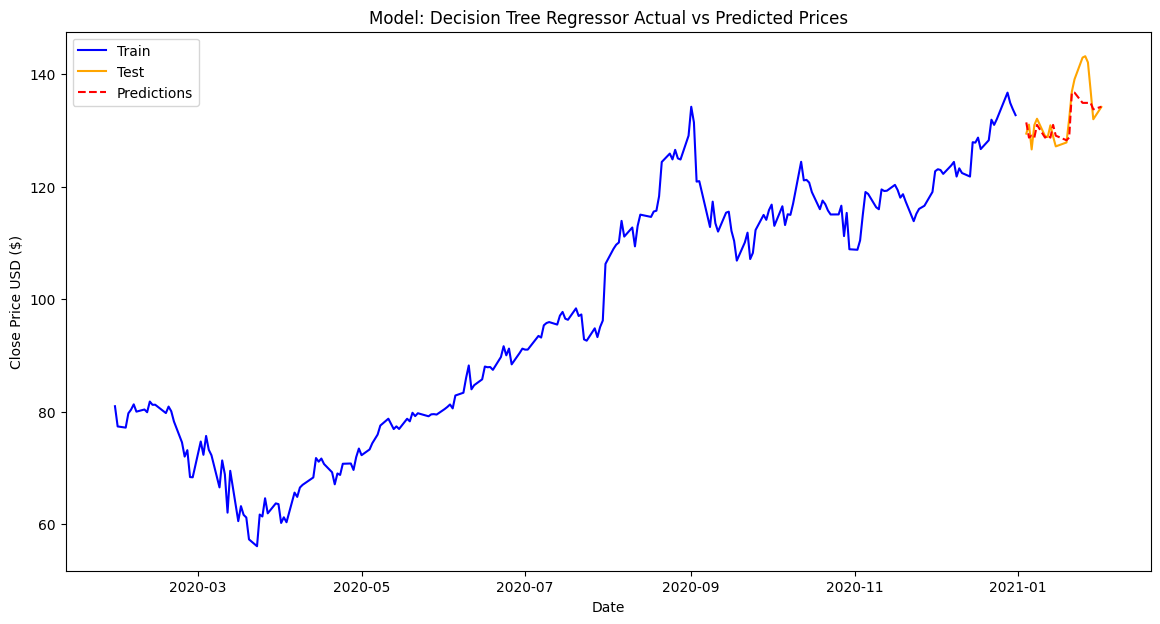

In [21]:
import matplotlib.pyplot as plt

# Plot the actual closing prices for training and test sets
plt.figure(figsize=(14, 7))
plt.plot(train_df.index, train_df['Close'], label='Train', color='blue')
plt.plot(test_df.index, test_df['Close'], label='Test', color='orange')

# Overlay the predicted prices on the test set
plt.plot(test_df.index, y_pred, label='Predictions', color='red', linestyle='--')

# Add title and labels
plt.title('Model: Decision Tree Regressor Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Show legend
plt.legend()

# Show the plot
plt.show()
